This notebook is an example for the use of the **prex** module in order to run the Piston Reconstruction Experiement.

In order to do so, I first run a YAO simulation and then use the generated data to run the Piston Reconstruction

# Basics

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import prex

from generalFunctions import *
set_style('def')

from IPython.display import clear_output

# Run the YAO simulation

Need to have a directory "YAO" with the yao parameter file (here: yao_example.par) and the atmsospheric screen, used in that file. 

In [2]:
%%writefile YAO/aoall.i
#include "yao.i"
aoread, "yao_example.par";
loop.method = "closed-loop";
aoinit, clean=1, keepdmconfig=0;
aoloop, savephase=0, savedm=1, saveslope=1;
go, all=1;

Overwriting YAO/aoall.i


In [3]:
%%writefile run_yao
#!/bin/bash
# Script to execute yorick and copy the files into a new test_folder

cd YAO/
echo "Running YAO"
yorick -batch aoall.i

Overwriting run_yao


In [4]:
! chmod +x run_yao
! ./run_yao
clear_output()

## Get the data

In [5]:
yaodata = prex.Yaodata('YAO/','yao_example')
datacube = yaodata._yao2data()
# datacube = [xslopes,yslopes,tip,tilt]
# slopes are POL slopes in 2D representation (as this is the input needed)

Only one SH-WFS, use shape of this
1 DMs detected


# P-REx

Needed input: list of x and y slopes (POL) in 2D representation and list of tip and tilt (also POL)

In [6]:
dPiston = yaodata.prexTT(datacube,average=10)

# Factor from WFS lenslets to used pixels:
nlenslets = 20
npixel = 200
fac = npixel/nlenslets

dPiston = [i*fac for i in dPiston]

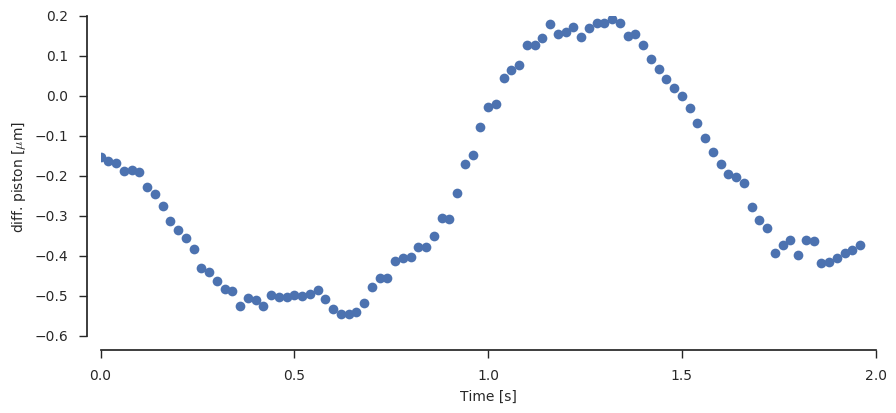

In [7]:
freq = 500
average = 10
step = average/freq
x = np.arange(0,len(dPiston)*step,step)

plt.plot(x,dPiston,marker='o',ls='')
plt.xlabel('Time [s]')
plt.ylabel('diff. piston [$\mu$m]')
hide_spines()
plt.show()

## Theoretical values

The YAO simulation offers the possibility to compare the reconstructed values to theoretical values. This includes some calculation factors etc. The whole procedure is done in 'yao2prexTTfast' (images are from left to right: windvelocity, tip & tilt, diff. Piston):

Only one SH-WFS, use shape of this
1 DMs detected
Standard Factor for D=8m & 200 pixel used. Need to be changed for a different konfiguration.
Use keyword factor
X-Shift: 0.320 +- 0.034
Y-Shift: 0.329 +- 0.027


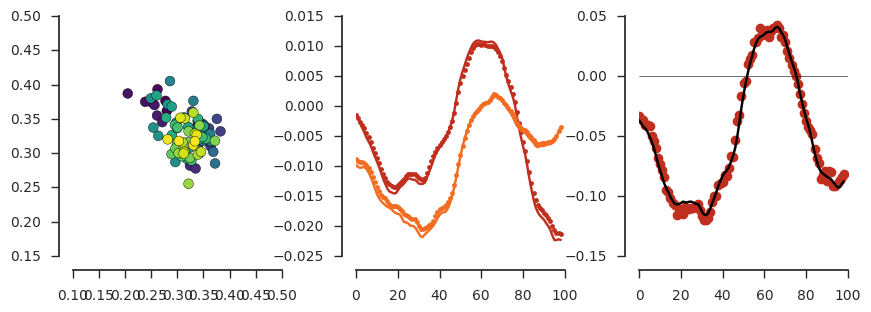

Strehl: 0.669


In [8]:
test = yaodata.yao2prexTTfast(plot=True)

In [9]:
print('Error of reconstructed differential piston is %.0f nm' % (test[0]*1000))

Error of reconstructed differential piston is 4 nm


## Get the real Piston

So far this has only been the differential piston. One can now calculate the actual piston from this. This is done in 'yao2prexTTpiston':

Only one SH-WFS, use shape of this
1 DMs detected
Standard Factor for D=8m & 200 pixel used. Need to be changed for a different konfiguration.
Use keyword factor
Strehl: 0.669


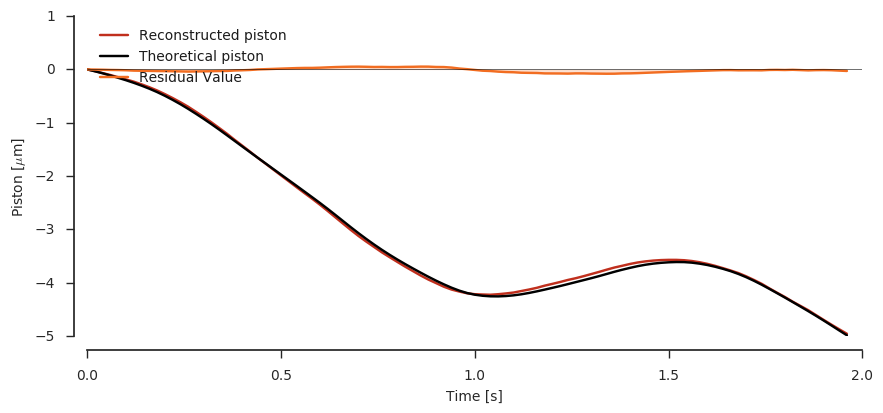

In [10]:
test = yaodata.yao2prexTTpiston(plot_piston=True,only_rms=True)

In [11]:
print('Error of piston reconstruction is %.0f nm' % (test*1000))

Error of piston reconstruction is 42 nm


In [12]:
!rm YAO/yao_example*.fits
!rm YAO/yao_example_TT*